<a href="https://colab.research.google.com/github/javier1nc/infotec-Clasificacion-de-frutas/blob/main/Clasificacion_de_frutas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**José Florentino Chavira Sánchez** | **Javier Sánchez Mendoza** 

Modelos Avanzados en Ciencia de Datos | Proyecto integrador

# Clasificacion de frutas


## Introducción
A lo largo del desarrollo de cualquier ser humano, principalmente en los primeros años de su educación básica, el niño se enfrenta en la conceptualización de todo lo que le rodea; es decir, necesita relacionar un objeto con su nombre, por ejemplo: el objeto árbol relacionarlo con sus características intrínsecas para cuando evoque esa palabra lo relacione con su figura y sus características. Sin embargo, no en todos se presenta este desarrollo, ya que se podría detectar esta deficiencia, por ejemplo, cuando un infante ilumina un elefante de color rosa o que confunda otras características.   

Dentro de las actividades que se desarrollan en el área de visión por computadora, es la extracción de características de imágenes, que se puede realizar de diferentes formas como son: textura, tamaño, color, etc. Así, se va ser uso de este recurso para llegar al objetivo esperado: reforzar o identificar un objeto por medio de imágenes desplegadas.

Una forma para reforzar o afianzar esta deficiencia, es mostrar imágenes de diferentes objetos o animales, visualizando sus características principales como son: su forma y color.  Esta forma de realizarlo, permitiría trabajar con una gran variedad imágenes de diferentes contextos, haciendo que se desarrolle la conceptualización efectivamente. Sólo se va a trabajar con 3 frutos para probar su funcionamiento. 


## Desarrollo
Se implementará un clasificador de imágenes basado en el Modelo de Perceptron Muticapas (MLP).

## Se revisa el número de clases:blueberry, naranja  y platano

Se descarga el dataset de imagenes y se descomprime


In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!wget -N "https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas.zip"
!unzip -qo frutas.zip

--2022-12-04 03:22:08--  https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas.zip
Resolving infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)... 52.219.176.58
Connecting to infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)|52.219.176.58|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘frutas.zip’ not modified on server. Omitting download.



Se carga la carpeta principal, fruta, donde contiene subcarpetas con diferentes nombres de frutas que contiene imágenes de ellas.

In [3]:
import os
chart_types = os.listdir(r'./frutas/')
print(chart_types)

['Platano', 'Naranja', 'Arandano']


###  Se cargan las imágenes y sus respectivas etiqueta
Se trabajan con las subcarpetas para etiquetar cada una de las imágenes que contiene con el nombre respectivo de la fruta que le corresponde.

1.   List item
2.   List item



In [4]:
import cv2   # se instala e importa opencv-python : una librería con varias herramientas de procesamiento de imágenesr
path = r"./frutas/"
im_size = 224  #Se especifica el tamaño que van a tener las imágenes.

# En la lista "images" se guardan todas las imágenes con tamaño especificado.
images = []

#Se almacenan las etiquetas correspondientes en la lista "labels".
labels = []

#Este primer ciclo revisará cada uno de los elementos de la carpeta fruta.
#La funcionalidad del segundo ciclo es ejecutar las subcarpetas, de una por una.
for i in chart_types:
    data_path = path + str(i)
    filenames = [i for i in os.listdir(data_path)]
# El segundo bucle aquí está realizando el concepto de redimensionamiento     
    for f in filenames:        
            img=cv2.imread(data_path + '/' + f)
          
            try:
                img = cv2.resize(img, (im_size, im_size), interpolation=cv2.INTER_NEAREST)
               
            except:
                break
          
            images.append(img)  #se van agrgando las imágens
            labels.append(i)    #se guardan las etiquetas

###  Transformar las imágenes a un tipo arreglo con la libreria numpy
Se transforman las imágenes a tipo de arreglo con la librería numpy. 

El tamaño de la imagen que se pasará a la Red Nueronal será de 224x224x3.

In [5]:
import numpy as np           
images = np.array(images)   # Se realiza la transformación de las imágenes a tipo arreglo para seguir procesando.
print(images.shape)         # Tiene dimensión 4: cantidad de imágens, cada imagen está definida por una matrix
# tridimensional que tiene 224 filas y 224 columnas, y un tensor de una dimensión de 3 elementos: RGB.

(2862, 224, 224, 3)


###  Codificación de las etiquetas
Se codifican las etiquetas para que en lugar que tengan letras, se trabaje con números.

Se necesita convertir las etiquetas de clase categóricas a etiquetas de clase numéricos para poderse trabajar con ellos.

In [6]:
from sklearn.preprocessing import LabelEncoder    # se instala sklearn e importar varios modelos de aprendizaje máquina 
                                                  # tradicionales.

labels_labelencoder = LabelEncoder()              # La función LabelEcoder() convierte la etiqueta de clase categórica 
y = labels_labelencoder.fit_transform(labels)     # a una etiqueta de clase numérica. El vector y contendrá valores 0,1,2.
#print(labels)
#print(y)

###  Dividir los datos en conjunto de entrenamiento y de prueba
Del conjunto de subcarpetas que contienen imágenes de diferentes frutas, ahora se va a asignar cierto porcentaje de las ellas para hacer pruebas y el resto para entrenarlos. Generalmente este último tiene el mayor porcentaje.

En la función train_test_split() se especificará el archivo a trabajar, images, el porcentaje de total de imágenes que
se utilizarán para hacer la prueba, test, en este caso será del 18% y el 82% se utilizará para entrenamiento, train.

In [7]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.18, random_state=42) # 2 variables para train 
                                                                                                # 2 variables para test.
print(train_x.shape)  #valores de entrenamiento,es de dimensión 4: # imágenes, dimesiones, RGB.
print(train_y.shape) #Tamaño de la etiqueta 
print(test_x.shape)  # datos para prueba, de dimensión 4: # imágenes, dimenesiones,RGB.
print(test_y.shape)

(2346, 224, 224, 3)
(2346,)
(516, 224, 224, 3)
(516,)


###  Modelo del Perceptron multicapas (MLP)
En este punto se inicia a trabajar con el Modelo del Perceptron Multicapas (MLP)

- Se cargan todas las librerías de Tensor Flow.
- Se trabaja con el modelo secuencial.
- Se trabaja con 4 capas escondidas.
- Se trabaja con la función de activación sigmoidal.

Se cargan todas la liberias Tensorflow para rabajar con el modelo en forma secuencial y para formar las capas ocultas.
Se va a trabajar con 4 capas y el softtmax.

In [8]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
#Se define el tipo de modelo a trabajar, en este caso el perceptron secuencial
#Se tienen 4 capas ocultas: h1,h2,h3 y h4
model = keras.Sequential([                       # la imagen que está en forma de matriz de 3 dimensiones 
keras.layers.Flatten(input_shape=(224,224,3)),   # el modelo Flatten la está convirtiendo a tipo vector. 
                                                 #El número de nodos que se tendrá de entrada será igual a 224x224x3.

keras.layers.Dense(256, activation=tf.nn.sigmoid, name="h1"), #1ra capa escondida con 256 nodos con función de activación sigmoidal
keras.layers.Dense(256, activation=tf.nn.sigmoid, name="h2"), #2da capa escondida con 256 nodos con función de activación sigmoidal
keras.layers.Dense(250, activation=tf.nn.sigmoid, name="h3"), #3ra capa escondida con 250 nodos con función de activación sigmoidal
keras.layers.Dense(50, activation=tf.nn.sigmoid, name="h4"), #4ta capa escondida con 50 nodos con función de activación sigmoidal
keras.layers.Dense(3, activation=tf.nn.softmax)]) # capa de salida con 3 nodos, uno para cada clase, tres frutas.
                                                  # Tiene función de activación softmax,que significa que desde la capa de salida
                                                  #se va obtener la probabilidad de conseguir cada uno de esto nivele de clase.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 h1 (Dense)                  (None, 256)               38535424  
                                                                 
 h2 (Dense)                  (None, 256)               65792     
                                                                 
 h3 (Dense)                  (None, 250)               64250     
                                                                 
 h4 (Dense)                  (None, 50)                12550     
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 38,678,169
Trainable params: 38,678,169
No

###  Establecer los parámetros para compilar el modelo: optimización, pérdidas y tipode métrica a utilizar
Establecer los parámetros para compilar el modelo: optimización, pérdida y tipo de métrica a utilizar.

In [9]:
model.compile(optimizer = 'adam',loss = keras.losses.binary_crossentropy,metrics=['accuracy'])

### Entrenamiento
Lo que proporciona a la salida en cada epoch es la pérdida, y la precisión. Como se visualiza, cambia en cada una de ellas.

Ahora se realiza el entrenamiento del modelo, donde se proporciona a la salida de cada epoch la información de pérdida y precisión.

In [10]:
history = model.fit(train_x,train_y,epochs=100)

Epoch 1/100
74/74 [==============================] - 31s 395ms/step - loss: 1.1105 - accuracy: 0.3112
Epoch 2/100
74/74 [==============================] - 18s 243ms/step - loss: 1.1090 - accuracy: 0.3295
Epoch 3/100
74/74 [==============================] - 18s 239ms/step - loss: 1.1090 - accuracy: 0.3346
Epoch 4/100
74/74 [==============================] - 18s 239ms/step - loss: 1.1090 - accuracy: 0.3380
Epoch 5/100
74/74 [==============================] - 18s 239ms/step - loss: 1.1090 - accuracy: 0.3278
Epoch 6/100
74/74 [==============================] - 18s 247ms/step - loss: 1.1090 - accuracy: 0.3444
Epoch 7/100
74/74 [==============================] - 18s 240ms/step - loss: 1.1090 - accuracy: 0.3325
Epoch 8/100
74/74 [==============================] - 18s 242ms/step - loss: 1.1090 - accuracy: 0.3278
Epoch 9/100
74/74 [==============================] - 19s 263ms/step - loss: 1.1090 - accuracy: 0.3461
Epoch 10/100
74/74 [==============================] - 19s 258ms/step - loss: 1.109

### Evaluar el rendimiento del modelo en el conjunto de datos de prueba dividido
Se evalúa el rendimiento del modelo con el conjunto de datos de prueba, entrega precisión y pérdida del modelo.


In [11]:
model.evaluate(test_x,test_y,batch_size=3)

172/172 [==============================] - 6s 35ms/step - loss: 1.1269 - accuracy: 0.3547


[1.1268552541732788, 0.35465115308761597]

In [12]:
from sklearn.metrics import accuracy_score,classification_report

In [24]:
#Estas métricas son el resultado del modelo para cada una de las muestras de ensayo
ypred = model.predict(test_x)
# argmax().- básicamente significa que a partir de este vector se asigna el índice de los valores más grandes. 
ypred = np.argmax(ypred,axis=1)

17/17 [==============================] - 1s 80ms/step


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report
pred_y_NN=model.predict(test_x)

17/17 [==============================] - 2s 82ms/step


### Guardar el modelo
Se guarda el modelo para no estar procesando desde el principio cada vez que se realice una prueba del mismo.

In [14]:
model.save('MLP_1.h1')

### Cargue el modelo guardado y pruebe sobre un solo conjunto de datos

Se carga el modelo guardado y se prueba con una imagen.

Para su verificación, se cambiarían las frutas para ver su clasificación,por lo que al guardar el modelo no se tendría que correr todo el programa para ver su efectividad.

In [15]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
model = tensorflow.keras.models.load_model('MLP_1.h1') #El archivo guardado del modelo se carga para probarlo.

In [16]:
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib.image import imread
import numpy as np

In [17]:
!wget -N "https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas_pruebas.zip"
!unzip -qo frutas_pruebas.zip

--2022-12-04 03:52:57--  https://infotec-dataset.s3.us-east-2.amazonaws.com/frutas_pruebas.zip
Resolving infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)... 52.219.97.74
Connecting to infotec-dataset.s3.us-east-2.amazonaws.com (infotec-dataset.s3.us-east-2.amazonaws.com)|52.219.97.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2159549 (2.1M) [application/zip]
Saving to: ‘frutas_pruebas.zip’

frutas_pruebas.zip  100%[===================>]   2.06M  11.4MB/s    in 0.2s    

2022-12-04 03:52:57 (11.4 MB/s) - ‘frutas_pruebas.zip’ saved [2159549/2159549]



In [18]:
img = load_img('./frutas_pruebas/Platano/86_100.jpg', target_size=(224, 224)) #Se lee la imagen y se dimensiona para su compraración

print(type(img))

<class 'PIL.Image.Image'>


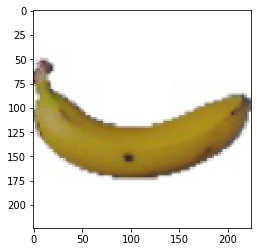

In [19]:
plt.imshow(img)
plt.show()

In [20]:
img = np.asarray(img)  # Se hacer la conversión a tipo arreglo.
img = np.expand_dims(img, axis=0) # Esta función amplía la matriz insertando un nuevo eje en la posición especificada.
                                 #Esta función requiere dos parámetros(arreglo de entrada, Posición en la que se insertará el nuevo eje)

In [21]:
predict = model.predict(img)
classes=predict=np.argmax(predict,axis=1)

1/1 [==============================] - 0s 100ms/step


### Verificación

Con estas condiciones, se va a verificar si el fruto de prueba corresponde a la clasificación proporcionada por el entrenamiento.

In [22]:
if classes==0:
    print(chart_types[0])
elif classes==1:
    print(chart_types[1])

elif classes==2:
     print(chart_types[2])

Arandano


In [23]:
print(predict)

[2]


## Conclusiones
Este modelo con el que se trabajó, MLP, es de los básicos, pero tuvo buen desempeño. Para obtener una precisión elevada, se tendría que tener una base de datos muy grande o incrementar el número de epochs. Con respecto al problema planteado, se pudo llegar a probar que cuando se le presente una fruta para identificar, esta es reconocida y se presenta nombre del fruto. 

Realizando 2 repeticiones de 10 minutos cada hora por día, se podría probar la efectividad de este proyecto. Este es sólo un instrumento para llegar a un fin, por lo que el acompañamiento de un adulto, para realizar la actividad, siempre es necesaria.  Este proyecto se podría mejorar, si se le agregara que dijera el nombre del fruto y además otra característica, como por ejemplo, que dijera redonda, cuadrada, alta, etc., pero está fuera del alcance planteado.

Se sabe que existen proyectos de este tipo y mejores, pero caros. Este proyecto sólo necesita una computadora, por lo que sería posible instalarlo en escuelas primarias para aplicación.
